In [2]:
import torch
import gpytorch
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from tqdm import tqdm
import pickle
import anndata
import os,sys,inspect
import scanpy as sc

# setting the path to source
sys.path.insert(0,os.path.dirname(os.getcwd()) + '/source') 

# new source imports 
import Main
import ClusterUtils
import TimeSeriesPreprocessor
import warnings
import pickle
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
DIR = '../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/FinalResults/Experiment2/'
aligners = {} 
for size in [0,1,3,5,10,15,20]:
    dataset_id = 'I_size'+str(size)
    print(dataset_id)
    with open(DIR+'aligner_'+dataset_id+'.pkl', 'rb') as f:
        aligners[dataset_id] = pickle.load(f)

I_size0
I_size1
I_size3
I_size5
I_size10
I_size15
I_size20


In [6]:
for size in [0,1,3,5,10,15,20]:
    dataset_id = 'D_size'+str(size)
    print(dataset_id)
    with open(DIR+'aligner_'+dataset_id+'.pkl', 'rb') as f:
        aligners[dataset_id] = pickle.load(f)

D_size0
D_size1
D_size3
D_size5
D_size10
D_size15
D_size20


In [8]:
aligners

{'I_size0': <Main.RefQueryAligner at 0x7f48fde311c0>,
 'I_size1': <Main.RefQueryAligner at 0x7f4950965bb0>,
 'I_size3': <Main.RefQueryAligner at 0x7f4950af86a0>,
 'I_size5': <Main.RefQueryAligner at 0x7f4950ae1fa0>,
 'I_size10': <Main.RefQueryAligner at 0x7f4951073430>,
 'I_size15': <Main.RefQueryAligner at 0x7f4950ed0220>,
 'I_size20': <Main.RefQueryAligner at 0x7f495107e790>,
 'D_size0': <Main.RefQueryAligner at 0x7f49740f6100>,
 'D_size1': <Main.RefQueryAligner at 0x7f4950bd2700>,
 'D_size3': <Main.RefQueryAligner at 0x7f48064eff70>,
 'D_size5': <Main.RefQueryAligner at 0x7f4950d80ee0>,
 'D_size10': <Main.RefQueryAligner at 0x7f4951117a60>,
 'D_size15': <Main.RefQueryAligner at 0x7f4950e36370>,
 'D_size20': <Main.RefQueryAligner at 0x7f4950c95df0>}

In [9]:
# write alignment results tables
def write_table(aligner, dataset_id):
    df = []
    for g in aligner.gene_list:
        al_obj = aligner.results_map[g]
        df.append([g, al_obj.alignment_str, al_obj.get_series_match_percentage()[0]] )
    df = pd.DataFrame(df)
    df.columns = ['Gene','5-state alignment string','Alignment similarity %']
    return df

write_table(aligners['I_size0'], 'I_size0')

,Gene,5-state alignment string,Alignment similarity %
0,Uggt1,MIIMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMVVVVVDMMM...,94.74
1,Fhl2,MMMMMMMMMMMMMMMMMMMMMMMMMMMIDIDMMMMMMMMMMMMMMM...,92.31
2,Pgap1,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMVVVVVVVDM...,98.25
3,Fev,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,100.00
4,Cryba2,MMMMMMMMMMMMMMMMMMMMMMWWWWWWWWDIVVVVVVVVMMMMMM...,96.61
...,...,...,...
764,Map3k15,MMMMMMMMMMMMMMMMMMMMMMMMMMIIDDMMMMMMMMMMMMMMMM...,92.31
765,Rai2,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,100.00
766,Rbbp7,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,100.00
767,Ap1s2,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMIDM...,96.08


In [10]:
# write alignment results tables
def write_table(aligner, dataset_id):
    df = []
    for g in aligner.gene_list:
        al_obj = aligner.results_map[g]
        df.append([g, al_obj.alignment_str, al_obj.get_series_match_percentage()[0]] )
    df = pd.DataFrame(df)
    df.columns = ['Gene','5-state alignment string','Alignment similarity %']
    df.to_csv('results/'+dataset_id+'gene_alignments.csv')
    return df

write_table(aligners['I_size0'], 'I_size0')
write_table(aligners['I_size1'], 'I_size1')
write_table(aligners['I_size3'], 'I_size3')
write_table(aligners['I_size5'], 'I_size5')
write_table(aligners['I_size10'], 'I_size10')
write_table(aligners['I_size15'], 'I_size15')
write_table(aligners['I_size20'], 'I_size20')
write_table(aligners['D_size0'], 'D_size0')
write_table(aligners['D_size1'], 'D_size1')
write_table(aligners['D_size3'], 'D_size3')
write_table(aligners['D_size5'], 'D_size5')
write_table(aligners['D_size10'], 'D_size10')
write_table(aligners['D_size15'], 'D_size15')
write_table(aligners['D_size20'], 'D_size20')

,Gene,5-state alignment string,Alignment similarity %
0,Uggt1,DDDDDMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMVVVVVVDMMMM...,89.29
1,Fhl2,MMMMMMMMMMMMMMMWWWWWWWWWWWWIMMMMMMMMMMMMMMMMMM...,98.39
2,Pgap1,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMVVVDDDMMM...,94.34
3,Fev,MMMMMMMMMMMMMMMMMMMMMMMMMWWWWWWWWWWIIMMMMMMMMM...,96.67
4,Cryba2,MMMMMMMMMMMMMMMMMMMMMMMMMWWWWWDMMMMMMMMMMMMMMM...,98.21
...,...,...,...
764,Map3k15,MMMMMMMMMMMMMWWWWWWWWWWWWWIMMMMMMMMMMMMMMMMMMM...,98.41
765,Rai2,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMWWWIII...,94.34
766,Rbbp7,DDDDDDDDDDDDDDDDMMMMMMVVVVVVVVVVVVVVVVMMMMMMMM...,75.76
767,Ap1s2,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMWWWIII...,94.34


572
197


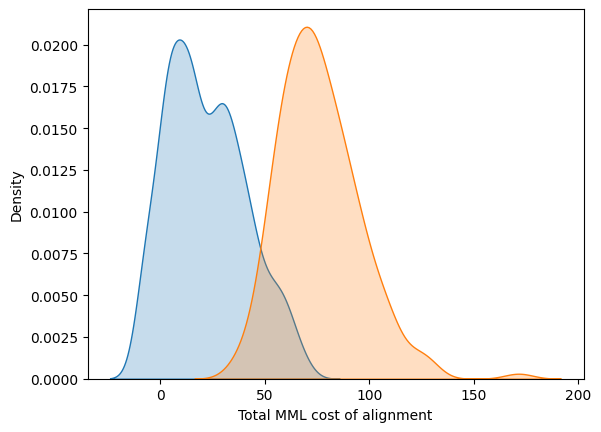

In [38]:
group1_10 = [] # not following expectation
group2_10 = [] # following expectation 

for a in aligners['D_size10'].results:
    if(a.match_percentage>=80):
        group1_10.append(a.fwd_DP.opt_cost)
    else:
        group2_10.append(a.fwd_DP.opt_cost)
print(len(group1_10))
print(len(group2_10))
#572 and 197
sb.kdeplot(group1_10, fill=True)
ax = sb.kdeplot(group2_10, fill=True)
plt.xlabel('Total MML cost of alignment')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(labels=['Genes not following expected pattern','Genes following expected pattern'])
plt.savefig('revision_figs/simexp2_response1.png')

558
211


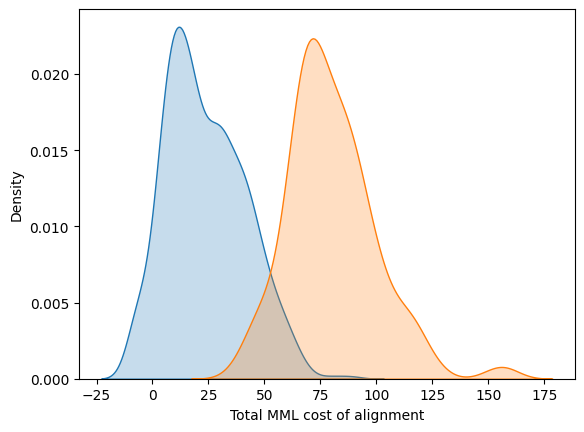

In [39]:
group1_15 = [] # not following expectation
group2_15 = [] # following expectation 

for a in aligners['D_size15'].results:
    if(a.match_percentage>=80):
        group1_15.append(a.fwd_DP.opt_cost)
    else:
        group2_15.append(a.fwd_DP.opt_cost)
print(len(group1_15))
print(len(group2_15))
sb.kdeplot(group1_15, fill=True)
sb.kdeplot(group2_15, fill=True)
# 558 and 211
plt.xlabel('Total MML cost of alignment')
#plt.legend(labels=['Genes not following expected pattern','Genes following expected pattern'])
plt.savefig('revision_figs/simexp2_response2.png')

545
224


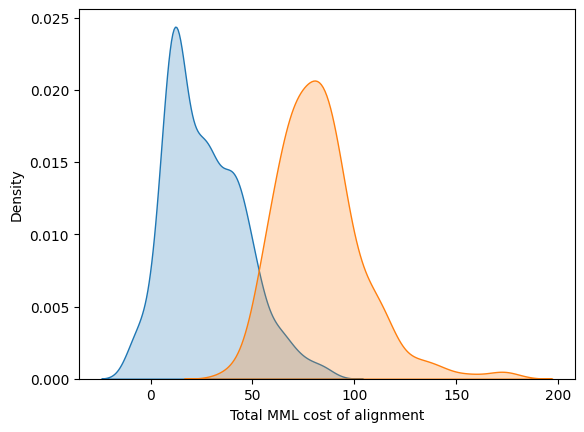

In [40]:
group1_20 = [] # not following expectation
group2_20 = [] # following expectation 

for a in aligners['D_size20'].results:
    if(a.match_percentage>=80):
        group1_20.append(a.fwd_DP.opt_cost)
    else:
        group2_20.append(a.fwd_DP.opt_cost)
print(len(group1_20))
print(len(group2_20))
#545 and 224
sb.kdeplot(group1_20, fill=True)
sb.kdeplot(group2_20, fill=True)
plt.xlabel('Total MML cost of alignment')
#plt.legend(labels=['Genes not following expected pattern','Genes following expected pattern'])
plt.savefig('revision_figs/simexp2_response3.png')

545
224


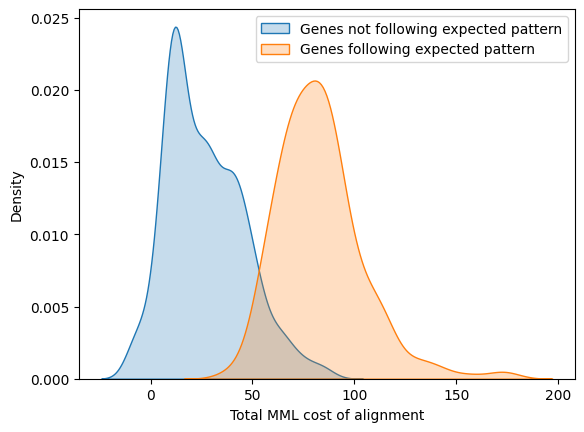

In [30]:
group1_20 = [] # not following expectation
group2_20 = [] # following expectation 

for a in aligners['D_size20'].results:
    if(a.match_percentage>=80):
        group1_20.append(a.fwd_DP.opt_cost)
    else:
        group2_20.append(a.fwd_DP.opt_cost)
print(len(group1_20))
print(len(group2_20))
#545 and 224
sb.kdeplot(group1_20, fill=True)
sb.kdeplot(group2_20, fill=True)
plt.xlabel('Total MML cost of alignment')
plt.legend(labels=['Genes not following expected pattern','Genes following expected pattern'])

In [32]:
group1 = [] # not following expectation
group2 = [] # following expectation 

for a in aligners['D_size20'].results:
    if(a.match_percentage>=80):
        print(a.gene)
        break

Uggt1


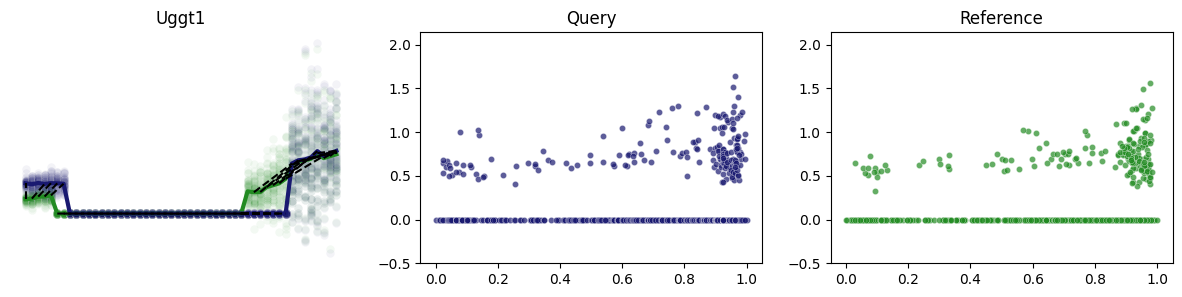

In [44]:
import VisualUtils
VisualUtils.plotTimeSeries('Uggt1',aligners['D_size0'])
plt.savefig('revision_figs/Uggt1_D0.png')

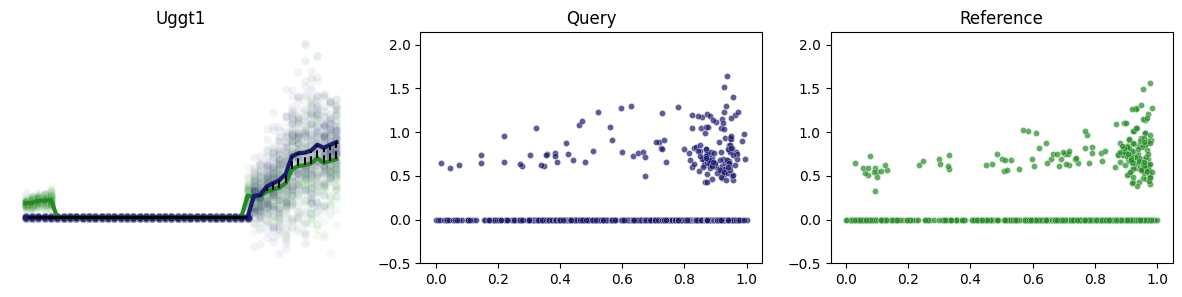

In [42]:
import VisualUtils
VisualUtils.plotTimeSeries('Uggt1',aligners['D_size20'])
plt.savefig('revision_figs/Uggt1_D20.png')

In [43]:
aligners['D_size0'].results_map['Uggt1'].alignment_str

'MIIMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMVVVVVDMMMMMMMMWWWWWW'

In [10]:
for a in aligners['D_size15'].results:
    print(a.alignment_str)
    break

DDDDDMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMVVVVVVVVDDDMMMMMMMMMMMM


In [11]:
for a in aligners['D_size20'].results:
    print(a.alignment_str)
    break

DDDDDMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMVVVVVVDMMMMMMMMMMMMMM
